In [1]:
%load_ext autoreload
%autoreload 2
    
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

from utils import *

import sys
sys.path.append("../")

# Shows files

In [2]:
config_names = [
   "MESSI",
   "SOFA + ED",
   "SOFA + EW"
]

        
path = "logs/MESSI_SFA_logs_leafs"
all_files = read_logs(log_type="query", path=path, config_names = config_names)

Config logs/MESSI_SFA_logs_leafs/ASTRO/10000
Config logs/MESSI_SFA_logs_leafs/ASTRO/20000
Config logs/MESSI_SFA_logs_leafs/ASTRO/250
Config logs/MESSI_SFA_logs_leafs/ASTRO/2500
Config logs/MESSI_SFA_logs_leafs/ASTRO/500
Config logs/MESSI_SFA_logs_leafs/ASTRO/5000
-----------------
Config logs/MESSI_SFA_logs_leafs/BIGANN/10000
Config logs/MESSI_SFA_logs_leafs/BIGANN/20000
Config logs/MESSI_SFA_logs_leafs/BIGANN/250
Config logs/MESSI_SFA_logs_leafs/BIGANN/2500
Config logs/MESSI_SFA_logs_leafs/BIGANN/500
Config logs/MESSI_SFA_logs_leafs/BIGANN/5000
-----------------
Config logs/MESSI_SFA_logs_leafs/DEEP1b/10000
Config logs/MESSI_SFA_logs_leafs/DEEP1b/20000
Config logs/MESSI_SFA_logs_leafs/DEEP1b/250
Config logs/MESSI_SFA_logs_leafs/DEEP1b/2500
Config logs/MESSI_SFA_logs_leafs/DEEP1b/500
Config logs/MESSI_SFA_logs_leafs/DEEP1b/5000
-----------------
Config logs/MESSI_SFA_logs_leafs/ETHC/10000
Config logs/MESSI_SFA_logs_leafs/ETHC/20000
Config logs/MESSI_SFA_logs_leafs/ETHC/250
Config logs/

In [3]:
query_times = pd.DataFrame(columns=["method", "querying time", "config", "dataset"])

i = 0
for ds_name, files in all_files.items():
    df_all = pd.DataFrame()
    # print (file.split("/")[2])
    for name, file in files.items():

        # display(df.head())
        df = pd.read_csv(file).iloc[:-1]  # last entry is the average        
        df["querying time"] = df["querying time"] / 1_000_000        
        df["method"] = name
        df["config"] = np.int32(file.split("/")[3])
        df["dataset"] = file.split("/")[2]

        query_times = pd.concat([query_times, df[["method", "querying time", "config", "dataset"]]], ignore_index=True)
        i = i+1        
        
    # df_all.rename(columns={"querying time" : "querying time in s"}, inplace=True)        

#df['Sampling'] = df['tenure'].astype('int64')

np.unique(query_times.dataset)

array(['ASTRO', 'BIGANN', 'DEEP1b', 'ETHC', 'ISC_EHB_DepthPhases',
       'Iquique', 'LenDB', 'Meier2019JGR', 'NEIC', 'OBS', 'OBST2024',
       'PNW', 'SALD', 'SCEDC', 'SIFT1b', 'STEAD', 'TXED'], dtype=object)

In [4]:
subset = query_times.rename(columns={
    "config":"Leaf Size", "dataset": "Dataset", "method": "Method",
    "querying time" : "query time in s"})



# subset = subset[query_times.method.isin([ "MESSI+\nSFA+ED+\nSIMD", "MESSI+\nSFA+EW+\nSIMD"])]
# subset.Method.replace("MESSI+\nSFA+ED+\nSIMD", "SOFA + ED", inplace=True)
# subset.Method.replace("MESSI+\nSFA+EW+\nSIMD", "SOFA + EW", inplace=True)

subset

,Method,query time in s,Leaf Size,Dataset
0,MESSI,0.006808,10000,ASTRO
1,MESSI,0.007638,10000,ASTRO
2,MESSI,0.007756,10000,ASTRO
3,MESSI,0.008128,10000,ASTRO
4,MESSI,0.009114,10000,ASTRO
...,...,...,...,...
30495,SOFA + EW,0.295503,5000,TXED
30496,SOFA + EW,0.430313,5000,TXED
30497,SOFA + EW,0.223555,5000,TXED
30498,SOFA + EW,0.276842,5000,TXED


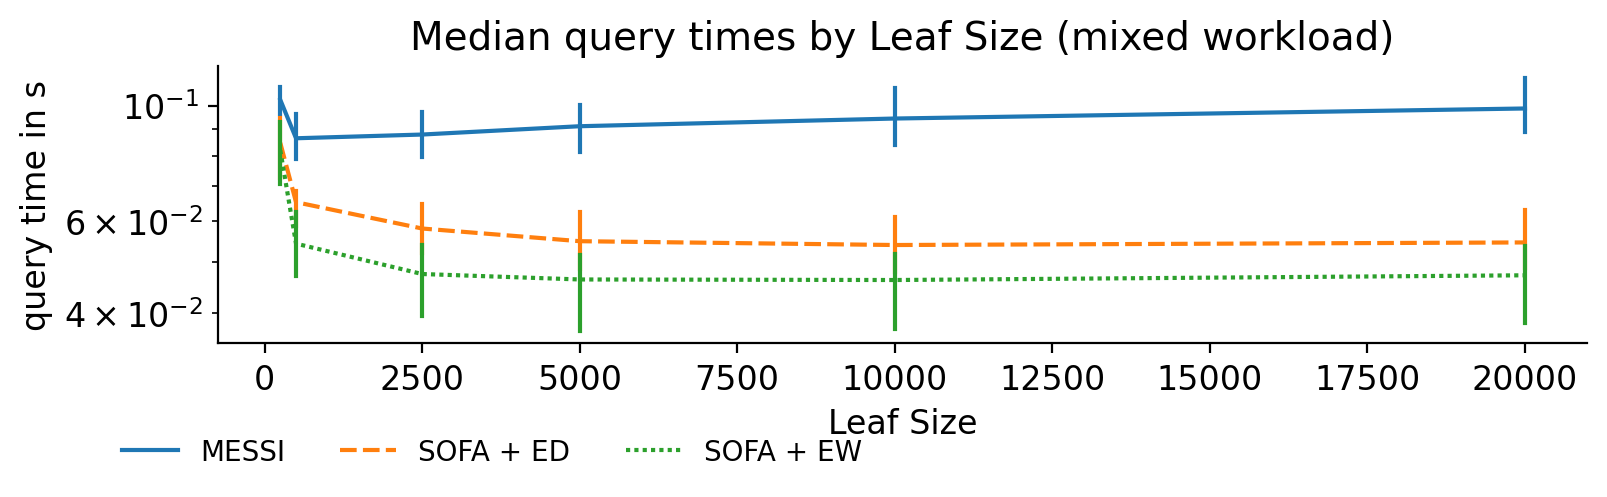

In [8]:
with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,3))
    sns.lineplot(x="Leaf Size", y="query time in s", hue="Method", estimator=np.median,  err_style="bars", 
                 style="Method", data=subset, ax = ax)
    ax.set_title("Median query times by Leaf Size (mixed workload)")
    legend = ax.legend() # removes the title
        
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.2, -0.25), ncol=4)
    plt.tight_layout()
    ax.set_yscale("log")
    
    sns.despine()
    plt.savefig("images/experiment_scalability_median_leaf_size.pdf", bbox_inches='tight')
    plt.show()

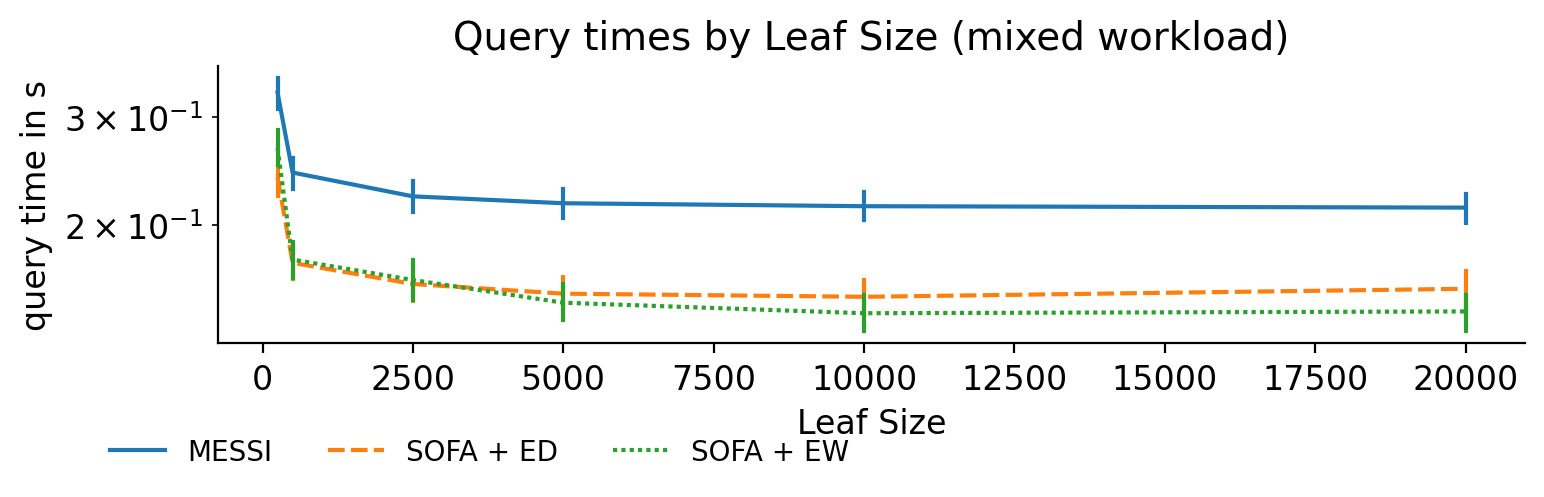

In [9]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,3))
    sns.lineplot(x="Leaf Size", y="query time in s", hue="Method", estimator=np.mean,  err_style="bars", 
                 style="Method", data=subset, ax = ax)
    ax.set_title("Query times by Leaf Size (mixed workload)")
    # ax.set_xlabel("Leaf Size")
    sns.despine()
    ax.set_yscale("log")
    legend = ax.legend() # removes the title
        
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.2, -0.25), ncol=4)
    plt.tight_layout()
    
    plt.savefig("images/experiment_scalability_mean_leaf_size.pdf", bbox_inches='tight')
    plt.show()

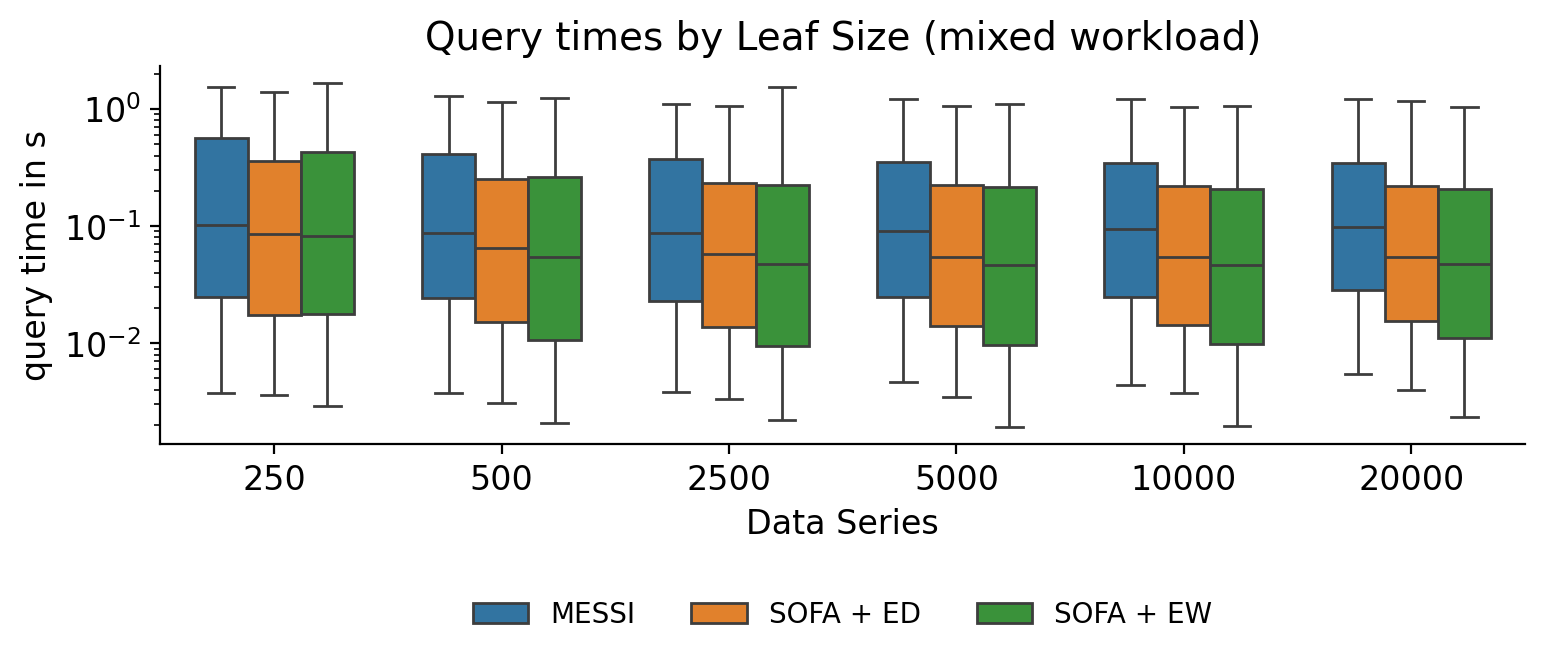

In [7]:

with plt.style.context({
    'font.size': 16,          # Default font size
    'axes.titlesize': 14,     # Font size for axes titles
    'axes.labelsize': 12,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 10,    # Font size for legend
    'figure.titlesize': 14    # Font size for figure title
}):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title("Query times by Leaf Size (mixed workload)")
    ax.set_xlabel("Data Series")
    sns.despine()
    ax.set_yscale("log")
    
    _ = sns.boxplot(hue="Method", y="query time in s", x="Leaf Size", data=subset, ax =ax, width=.7)

    legend = ax.legend() # removes the title
    
    sns.move_legend(ax, "upper center", frameon=False, bbox_to_anchor=(.5, -0.35), ncol=4)
    plt.tight_layout()
    
    plt.savefig("images/experiment_scalability_boxplot_leaf_size.pdf", bbox_inches='tight')
    plt.show()